# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Based on API documentation: https://openweathermap.org/current#name
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Format specification: https://openweathermap.org/current#example_JSON
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rouissat


Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | hauterive
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cannonvale
Processing Record 7 of Set 1 | phan thiet
Processing Record 8 of Set 1 | katsuren-haebaru
Processing Record 9 of Set 1 | brisas de zicatela
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | fonte boa
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | porto novo
Processing Record 23 of Set 1 | vila franca do campo
Processing Record 24 of Set 1 | isafjordur
Processing Record 25 of Set 1 | mohr
Processi

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,292.55,46,11,1.70,AU,1713752392
1,rouissat,31.9243,5.3502,289.19,55,1,8.75,DZ,1713752392
2,stanley,54.8680,-1.6985,277.75,93,100,1.03,GB,1713752393
3,hauterive,46.0901,3.4459,276.57,98,33,0.94,FR,1713752393
4,ushuaia,-54.8000,-68.3000,278.96,75,75,2.57,AR,1713752224


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,292.55,46,11,1.70,AU,1713752392
1,rouissat,31.9243,5.3502,289.19,55,1,8.75,DZ,1713752392
2,stanley,54.8680,-1.6985,277.75,93,100,1.03,GB,1713752393
3,hauterive,46.0901,3.4459,276.57,98,33,0.94,FR,1713752393
4,ushuaia,-54.8000,-68.3000,278.96,75,75,2.57,AR,1713752224


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

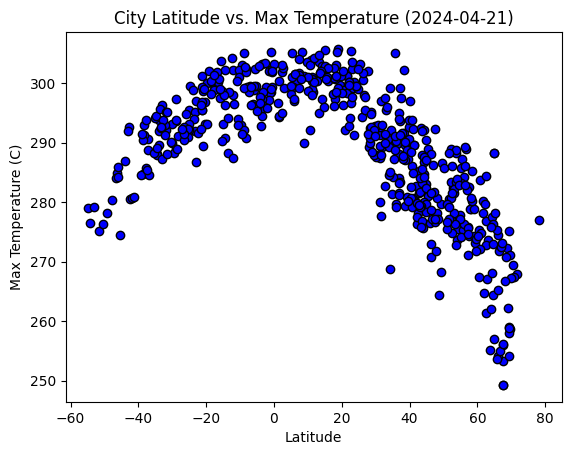

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

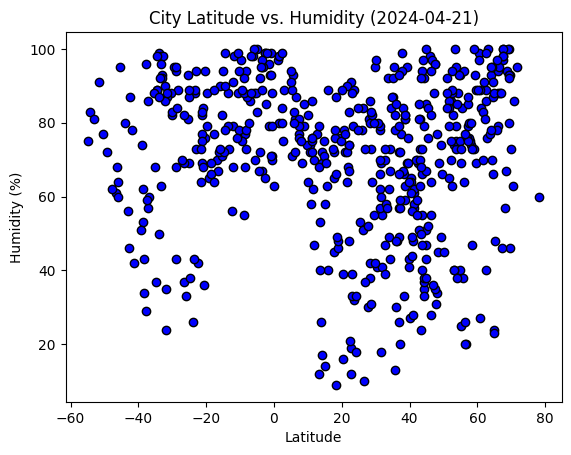

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

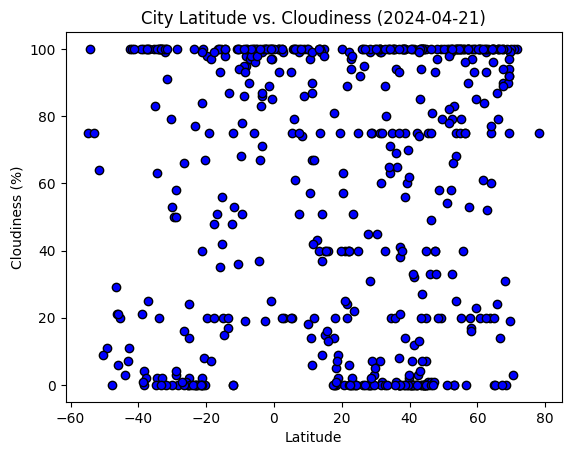

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

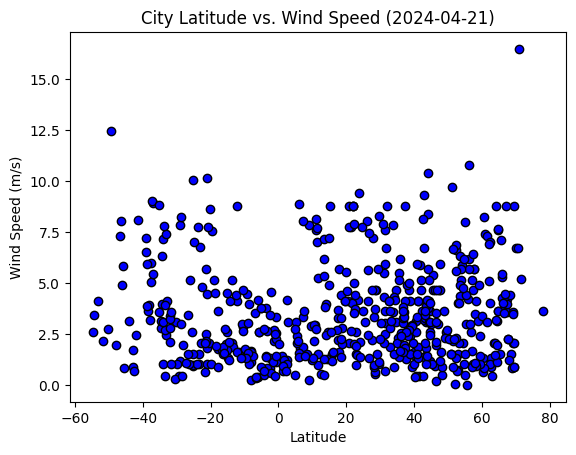

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots

def plot_regression(x_values, y_values, pos):
  """
  Call this function to add a linear regression to the current in-progress plot.
  """
  regression = linregress(x_values, y_values)
  plt.plot(x_values, regression.slope * x_values + regression.intercept, "r-")
  plt.annotate(f"y={regression.slope:0.2f}x + {regression.intercept:0.2f} (r={regression.rvalue:.2f})", pos, xycoords="axes fraction", fontsize=10, color="red")
  print(regression.rvalue)

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rouissat,31.9243,5.3502,289.19,55,1,8.75,DZ,1713752392
2,stanley,54.8680,-1.6985,277.75,93,100,1.03,GB,1713752393
3,hauterive,46.0901,3.4459,276.57,98,33,0.94,FR,1713752393
6,phan thiet,10.9333,108.1000,303.97,58,14,2.93,VN,1713752393
7,katsuren-haebaru,26.3369,127.8719,300.58,84,100,4.12,JP,1713751976


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,292.55,46,11,1.70,AU,1713752392
4,ushuaia,-54.8000,-68.3000,278.96,75,75,2.57,AR,1713752224
5,cannonvale,-20.2833,148.7000,296.81,76,67,8.60,AU,1713752393
9,waitangi,-43.9535,-176.5597,286.94,80,3,3.13,NZ,1713752394
11,puerto natales,-51.7236,-72.4875,275.10,91,64,2.14,CL,1713752394


###  Temperature vs. Latitude Linear Regression Plot

-0.8550316969332707


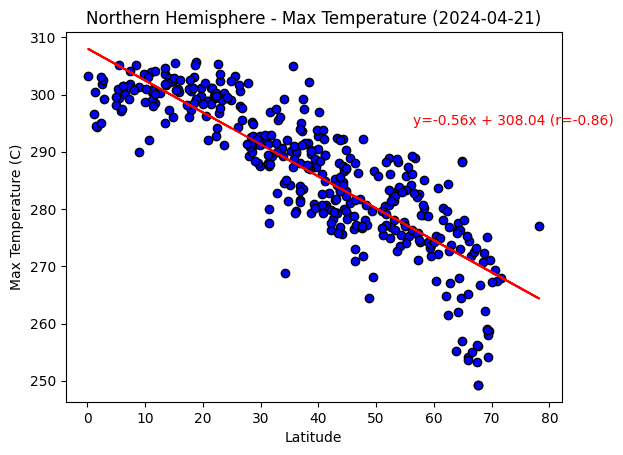

In [44]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Hemisphere - Max Temperature ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0.7, 0.75))
plt.show()

0.7825988718591433


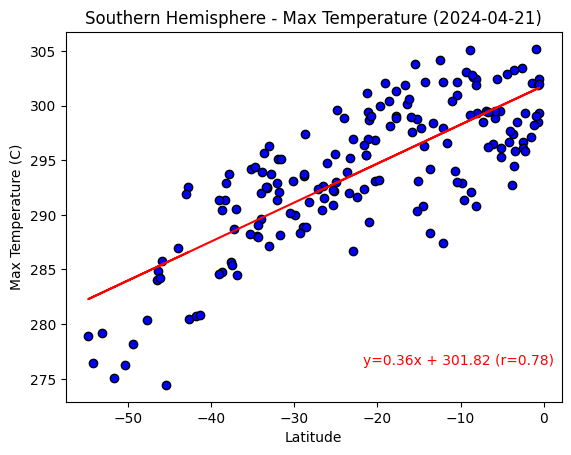

In [45]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Southern Hemisphere - Max Temperature ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (0.6, .1))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.1386383643661395


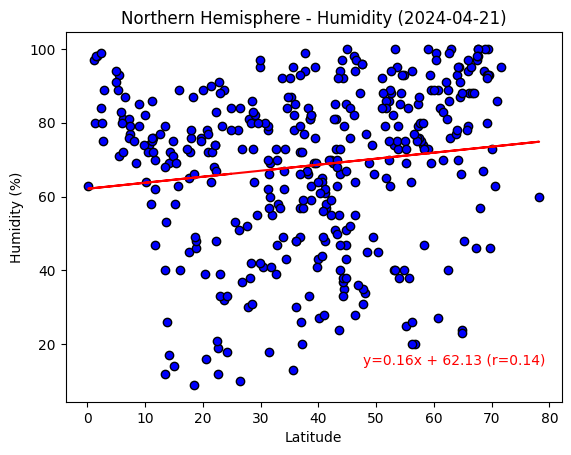

In [46]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (0.6, 0.1))

0.3007105832330452


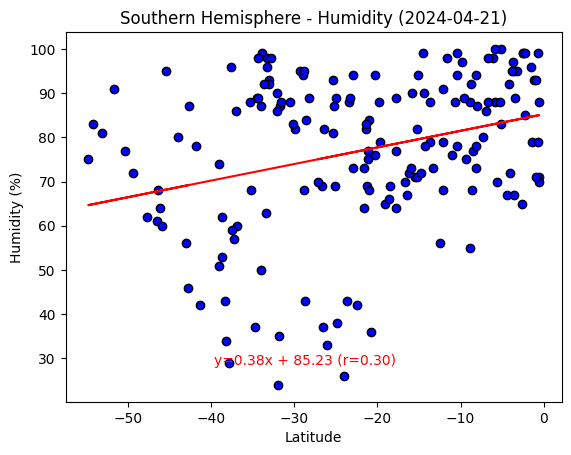

In [47]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (0.3, 0.1))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.12704322485952088


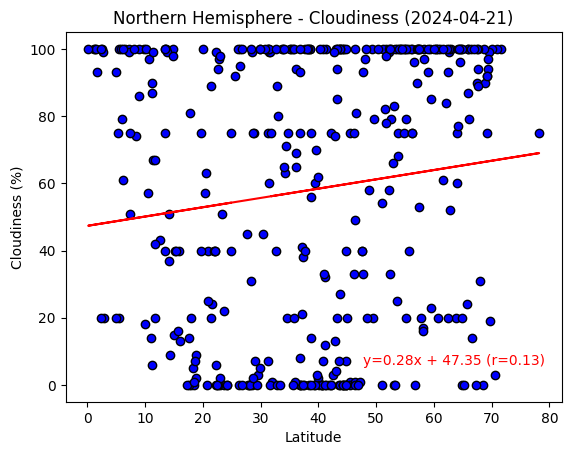

In [48]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (0.6, 0.1))

0.32060620719268185


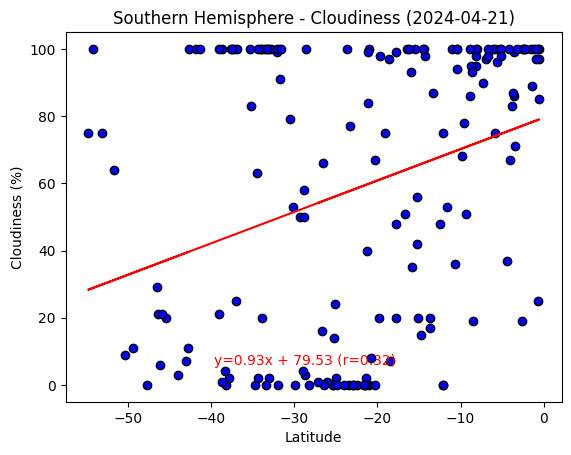

In [49]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (0.3, 0.1))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.06523482687539935


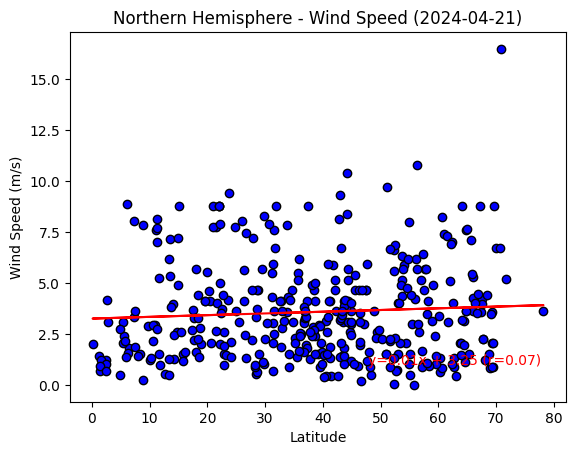

In [50]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Hemisphere - Wind Speed ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (0.6, 0.1))

-0.34862417509355587


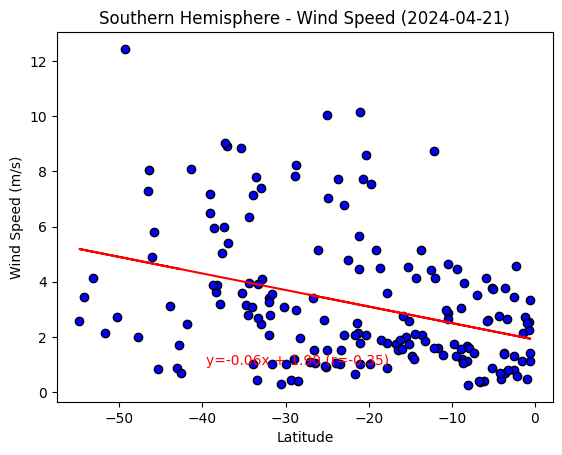

In [51]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Hemisphere - Wind Speed ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (0.3, 0.1))

**Discussion about the linear relationship:** YOUR RESPONSE HERE